# Machine Learning Analysis on Iris Data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Classification 

### Phase 01 - Data Exploration

In [2]:
# Load the data set
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'outcome']
iris = pd.read_csv('datasets/iris_data.csv', names=columns)

In [3]:
# feature names
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,outcome
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# dimensions of the dataset
iris.shape

(150, 5)

In [5]:
# statistical description of the dataset
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# dataset information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   outcome       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
iris.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
outcome         0
dtype: int64

In [20]:
iris.isna().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
outcome         0
dtype: int64

In [7]:
# class distribution
iris.groupby('outcome').size()

outcome
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

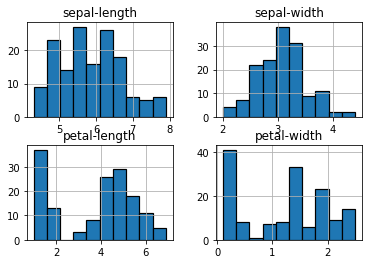

In [8]:
iris.hist(edgecolor='black', linewidth=1.2)

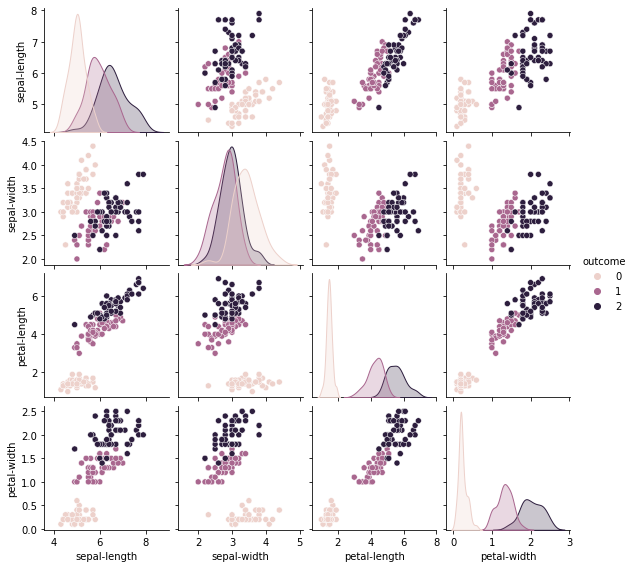

In [18]:
sns.pairplot(data=iris, hue="outcome", height=2)

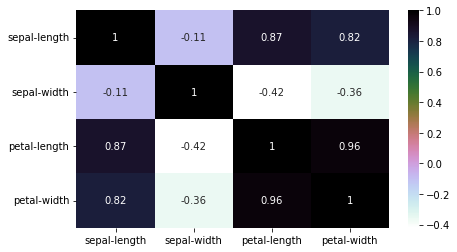

In [10]:
# Plot heatmap which shows correlations
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

### Phase 02 - Data Cleaning

In [11]:
# replace text outcomes classes with numerical data
cleanup_nums = {"outcome": {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica" : 2}}

iris.replace(cleanup_nums, inplace=True)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,outcome
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Phase 03 - Feature Selection

In [12]:
# features
features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
X = iris[features]

# responses
y = iris.outcome

### Phase 04 - Model Selection

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [14]:
# model list
models = []

models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("BNB", BernoulliNB()))
models.append(("GNB", GaussianNB()))

In [16]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name' : names, 'Score' : scores })
print(kf_cross_val)

  Name     Score
0  KNN  0.960000
1   DT  0.960000
2  BNB  0.333333
3  GNB  0.960000


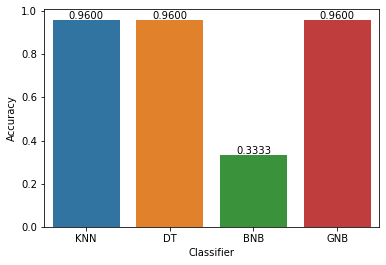

In [17]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [24]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(iris.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(random_state=17)
knn = KNeighborsClassifier()

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [25]:
d  = [[0, 0], [0, 0], [1, 1], [1, 1]]
d_scaled = scaler.fit_transform(d)
d_scaled

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


tree_pred = tree.predict(X_holdout)
print (f" Accuracy for decision tree is {accuracy_score(y_holdout, tree_pred)}") 

knn_pred = knn.predict(X_holdout_scaled)
print (f" Accuracy for k-nn is {accuracy_score(y_holdout, knn_pred)}")

 Accuracy for decision tree is 1.0
 Accuracy for k-nn is 1.0


In [27]:

small_tree = DecisionTreeClassifier(max_depth = 2,random_state=17)
# small_tree = DecisionTreeClassifier(max_depth = 5,random_state=17)

big_tree = DecisionTreeClassifier(max_depth = 8,random_state=17)
# big_tree = DecisionTreeClassifier(random_state=17)



small_data_train , _, small_data_train_y, _ = train_test_split(X_train, y_train, test_size=0.9,random_state=17)
print (f"Small data shape is {small_data_train.shape,small_data_train_y.shape}")

big_data_train, big_data_train_y = X_train,y_train
print (f"Big data shape is {big_data_train.shape,big_data_train_y.shape}")

print (f"=================================================")
print (f"Results demonstrating underfitting and overfitting")
print (f"=================================================")

print ('\n')
small_tree.fit(small_data_train, small_data_train_y)
tree_pred_test = small_tree.predict(X_holdout)
tree_pred_train = small_tree.predict(small_data_train)
print (f" Train Accuracy for small decision tree trained on small data is {accuracy_score(small_data_train_y, tree_pred_train)}, while test accuracy is  {accuracy_score(y_holdout, tree_pred_test)}") 

print ('\n')

big_tree.fit(small_data_train, small_data_train_y)
tree_pred_test = big_tree.predict(X_holdout)
tree_pred_train = big_tree.predict(small_data_train)
print (f" Train Accuracy for Large decision tree trained on small data is {accuracy_score(small_data_train_y, tree_pred_train)}, while test accuracy is  {accuracy_score(y_holdout, tree_pred_test)}") 

print ('\n')

small_tree.fit(big_data_train, big_data_train_y)
tree_pred_test = small_tree.predict(X_holdout)
tree_pred_train = small_tree.predict(small_data_train)
print (f" Train Accuracy for small decision tree trained on Big data is {accuracy_score(small_data_train_y, tree_pred_train)}, while test accuracy is  {accuracy_score(y_holdout, tree_pred_test)}") 

print ('\n')
big_tree.fit(big_data_train, big_data_train_y)
tree_pred_test = big_tree.predict(X_holdout)
tree_pred_train = big_tree.predict(small_data_train)
print (f" Train Accuracy for Large decision tree trained on Big data is {accuracy_score(small_data_train_y, tree_pred_train)}, while test accuracy is  {accuracy_score(y_holdout, tree_pred_test)}")

Small data shape is ((10, 5), (10,))
Big data shape is ((105, 5), (105,))
Results demonstrating underfitting and overfitting


 Train Accuracy for small decision tree trained on small data is 1.0, while test accuracy is  1.0


 Train Accuracy for Large decision tree trained on small data is 1.0, while test accuracy is  1.0


 Train Accuracy for small decision tree trained on Big data is 1.0, while test accuracy is  1.0


 Train Accuracy for Large decision tree trained on Big data is 1.0, while test accuracy is  1.0


In [28]:


def count_0_1(arr):
    pos_count = np.count_nonzero(arr==1)
    neg_count = np.count_nonzero(arr==0)
    return pos_count, neg_count

def get_confusion_accuracy(a,b):
    cm = confusion_matrix(a, b)
    print (f"===============")
    print (cm)
    print (f"===============")
    return (accuracy_score(a, b))


tree = DecisionTreeClassifier(random_state=17)

train_pos_x = X_train[y_train==1]
train_neg_x =  X_train[y_train==0]

test_pos_x = X_holdout[y_holdout==1]
test_neg_x = X_holdout[y_holdout==0]

# print (train_pos_x.shape,train_neg_x.shape,test_pos_x.shape,test_neg_x.shape )

print (f"=================================================")
print (f"Balanced and Imbalanced dataset statistics")
print (f"=================================================")


balance_train_x, balance_train_y = np.concatenate((train_pos_x,train_neg_x[0:350])), np.concatenate(([1]*350,[0]*350))
pos_count, neg_count = count_0_1(balance_train_y)
print (f"For Balance Training Dataset, shape is {balance_train_x.shape} and we have {pos_count} positive class, and {neg_count} negative class")


imbalance_train_x, imbalance_train_y = np.concatenate((train_pos_x[0:10],train_neg_x)), np.concatenate(([1]*10,[0]*1983))
pos_count, neg_count = count_0_1(imbalance_train_y)
print (f"For ImBalance Training Dataset, shape is {imbalance_train_x.shape} and we have {pos_count} positive class, and {neg_count} negative class")


balance_test_x, balance_test_y = np.concatenate((test_pos_x,test_neg_x[0:133])), np.concatenate(([1]*133,[0]*133))
pos_count, neg_count = count_0_1(balance_test_y)
print (f"For Balance Testing Dataset, shape is {balance_test_x.shape} and we have {pos_count} positive class, and {neg_count} negative class")


imbalance_test_x, imbalance_test_y = np.concatenate((test_pos_x[0:5],test_neg_x)), np.concatenate(([1]*5,[0]*867))
pos_count, neg_count = count_0_1(imbalance_test_y)
print (f"For ImBalance Testing Dataset, shape is {imbalance_test_x.shape} and we have {pos_count} positive class, and {neg_count} negative class")

print ('\n')


print (f"=================================================")
print (f"Train on balance and test on imbalance")
print (f"=================================================")

tree.fit(balance_train_x, balance_train_y)
tree_pred_test = tree.predict(imbalance_test_x)
tree_pred_train = tree.predict(balance_train_x)
print (f" Train Accuracy for decision tree trained on balanced data is {get_confusion_accuracy(balance_train_y, tree_pred_train)}, while test accuracy on imbalanced data is {get_confusion_accuracy(imbalance_test_y, tree_pred_test)}") 

print ('\n')

print (f"=================================================")
print (f"Train on balance and test on balance")
print (f"=================================================")
tree_pred_test = tree.predict(balance_test_x)
print (f" Train Accuracy for decision tree trained on balanced data is {get_confusion_accuracy(balance_train_y, tree_pred_train)}, while test accuracy on balanced data is {get_confusion_accuracy(balance_test_y, tree_pred_test)}") 

print ('\n')

print (f"=================================================")
print (f"Train on imbalance and test on balance")
print (f"=================================================")
tree.fit(imbalance_train_x, imbalance_train_y)
tree_pred_test = tree.predict(balance_test_x)
tree_pred_train = tree.predict(imbalance_train_x)
print (f" Train Accuracy for decision tree trained on imbalanced data is {get_confusion_accuracy(imbalance_train_y, tree_pred_train)}, while test accuracy on balanced data is {get_confusion_accuracy(balance_test_y, tree_pred_test)}") 


print ('\n')
print (f"=================================================")
print (f"Train on imbalance and test on imbalance")
print (f"=================================================")
tree_pred_test = tree.predict(imbalance_test_x)
print (f" Train Accuracy for decision tree trained on imbalanced data is {get_confusion_accuracy(imbalance_train_y, tree_pred_train)}, while test accuracy on imbalanced data is  {get_confusion_accuracy(imbalance_test_y, tree_pred_test)}") 





Balanced and Imbalanced dataset statistics
For Balance Training Dataset, shape is (69, 5) and we have 350 positive class, and 350 negative class
For ImBalance Training Dataset, shape is (48, 5) and we have 10 positive class, and 1983 negative class
For Balance Testing Dataset, shape is (31, 5) and we have 133 positive class, and 133 negative class
For ImBalance Testing Dataset, shape is (17, 5) and we have 5 positive class, and 867 negative class


Train on balance and test on imbalance


ValueError: Number of labels=700 does not match number of samples=69

In [29]:
np.random.seed(17)

tree = DecisionTreeClassifier(random_state=17)

tree.fit(X_train, y_train)

print (f"=================================================")
print (f"Results without addition of irrelevant attributes")
print (f"=================================================")


tree_pred = tree.predict(X_holdout)
print (f" Accuracy of decision tree on test dataset {accuracy_score(y_holdout, tree_pred)}") 

tree_pred = tree.predict(X_train)
print (f" Accuracy for decision tree on training dataset {accuracy_score(y_train, tree_pred)}")


noise_train = np.expand_dims(np.random.normal(30,100,2333), axis=1) #noise train
noise_test = np.expand_dims(np.random.normal(500,200,1000), axis=1)  #noise test


X_train_noise = np.concatenate((X_train,noise_train),axis=1) #Adding irrelavant attribute to train
X_holdout_noise = np.concatenate((X_holdout,noise_test),axis=1) #Adding irrelavant attribute to test

tree.fit(X_train_noise, y_train) # Fitting decision tree 

print (f"=================================================")
print (f"Results with addition of irrelevant attributes")
print (f"=================================================")

tree_pred = tree.predict(X_holdout_noise)
print (f" Accuracy of decision tree on test dataset {accuracy_score(y_holdout, tree_pred)}") 

tree_pred = tree.predict(X_train_noise)
print (f" Accuracy for decision tree on training dataset {accuracy_score(y_train, tree_pred)}")

Results without addition of irrelevant attributes
 Accuracy of decision tree on test dataset 1.0
 Accuracy for decision tree on training dataset 1.0


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 105 and the array at index 1 has size 2333

In [30]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,15),
               'max_features': range(4,30)}

tree_grid = GridSearchCV(tree, tree_params, cv=10, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 10 folds for each of 364 candidates, totalling 3640 fits


C:\Users\sched\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.70454545 0.70454545        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 1.         1.                nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 1.         1.
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan      

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'max_features': range(4, 30)},
             verbose=True)

In [31]:
tree_grid.best_params_, tree_grid.best_score_ 

({'max_depth': 2, 'max_features': 4}, 1.0)